In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('data/bank-full.csv', sep=';')

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
print(len(df))
df = df.drop_duplicates()
df.dropna()
df.fillna(0)
print(len(df))

45211
45211


In [11]:
df['age_range'] = pd.cut(df['age'], 
                             bins=[0, 17, 29, 39, 49, 59, 69, 120], 
                             labels=['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70+'],
                             right=True)

In [68]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-59
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40-49
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30-39
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40-49
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30-39


In [69]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [20]:
new_df = df['age'].agg(['mean','median','var','max', 'min'])
new_df.head()

mean       40.936210
median     39.000000
var       112.758107
max        95.000000
min        18.000000
Name: age, dtype: float64

In [21]:
import matplotlib.pyplot as plt

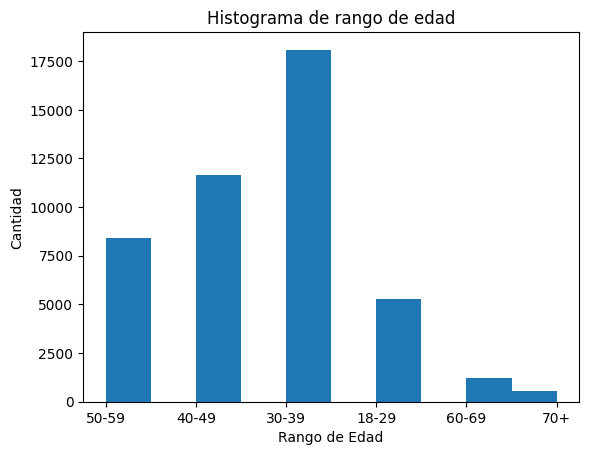

In [61]:
plt.hist(df["age_range"], bins=10)
plt.title("Histograma de rango de edad")
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.show()

In [27]:
print(len(df))
df_filtrado = df.loc[df["duration"] > 60]
print(len(df_filtrado))

45211
40445


In [36]:
def seconds_to_minutes(seconds):
    minutes = seconds // 60
    remaining = seconds % 60
    return f"{minutes}m {remaining}s"

In [67]:
table = df_filtrado.groupby("job")["duration"].agg(["mean", "median", "min", "max", "std"]).reset_index()
table["min_minutes"] = table["min"].apply(seconds_to_minutes)
table["max_minutes"] = table["max"].apply(seconds_to_minutes)
table["std_minutes"] = table["std"].round(0).apply(seconds_to_minutes)
table["mean_minutes"] = table["mean"].apply(lambda x: seconds_to_minutes(int(x)))
table["median_minutes"] = table["median"].apply(lambda x: seconds_to_minutes(int(x)))
df_new = table[["job", "mean", "max", "std", "median", "min_minutes", "max_minutes", "std_minutes", "mean_minutes", "median_minutes"]]
print(df_new)

              job        mean   max         std  median min_minutes  \
0          admin.  270.456774  3284  241.654241   194.5       1m 1s   
1     blue-collar  294.088215  3422  262.742550   210.0       1m 1s   
2    entrepreneur  281.350299  2769  249.199561   199.0       1m 1s   
3       housemaid  274.378205  2692  263.688069   183.5       1m 1s   
4      management  279.387439  3881  259.697938   194.0       1m 1s   
5         retired  304.510146  2635  264.099095   219.0       1m 1s   
6   self-employed  294.845230  3322  286.001675   200.0       1m 1s   
7        services  285.153970  3785  262.033473   205.0       1m 1s   
8         student  274.210590  2429  228.466138   207.0       1m 2s   
9      technician  277.765396  4918  259.249939   196.0       1m 1s   
10     unemployed  316.850810  3025  292.215993   224.0       1m 1s   
11        unknown  277.850000  1487  227.148658   211.0       1m 3s   

   max_minutes std_minutes mean_minutes median_minutes  
0      54m 44s   4.

In [43]:
import seaborn as sns

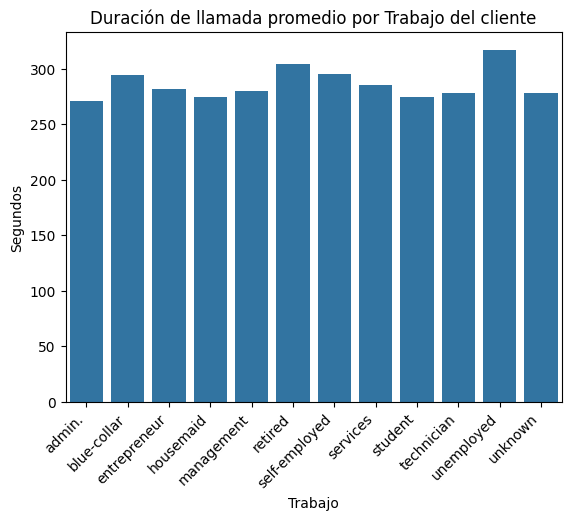

In [105]:
sns.barplot(data=df_new, x="job", y="mean")
plt.title("Duración de llamada promedio por Trabajo del cliente")
plt.xlabel("Trabajo")
plt.ylabel("Segundos")
plt.xticks(rotation=45, ha='right')
plt.show()

In [103]:
df_filtrado = df.loc[(df["pdays"] == -1) & (df["contact"] == "cellular")]
month_order = ["jan", "feb", "mar", "apr", "may", "jun",
               "jul", "aug", "sep", "oct", "nov", "dec"]
df_filtrado["month"] = pd.Categorical(
    df_filtrado["month"],
    categories=month_order,
    ordered=True
)
table_std = (
    df_filtrado
    .groupby(["month","marital"])["duration"]
    .agg(std_duration="std")
    .sort_values(["month", "marital"], ascending=True)
)

print(table_std)


                std_duration
month marital               
jan   divorced    335.993292
      married     298.686996
      single      292.456664
feb   divorced    240.171388
      married     282.161874
      single      254.565870
mar   divorced    189.748914
      married     359.139666
      single      175.253534
apr   divorced    250.606554
      married     279.880351
      single      229.841785
may   divorced    265.338288
      married     233.382317
      single      264.835690
jun   divorced    304.343530
      married     211.236920
      single      220.861421
jul   divorced    300.037964
      married     257.457279
      single      278.422536
aug   divorced    247.471976
      married     238.256059
      single      249.984629
sep   divorced    350.227273
      married     195.475651
      single      276.689979
oct   divorced    260.816713
      married     290.841775
      single      254.924103
nov   divorced    261.304282
      married     263.431344
      single  

C:\Users\hilla\AppData\Local\Temp\ipykernel_20988\956983708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["month"] = pd.Categorical(
C:\Users\hilla\AppData\Local\Temp\ipykernel_20988\956983708.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["month","marital"])["duration"]


C:\Users\hilla\AppData\Local\Temp\ipykernel_20988\364988261.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  matrix = table_std.pivot_table(


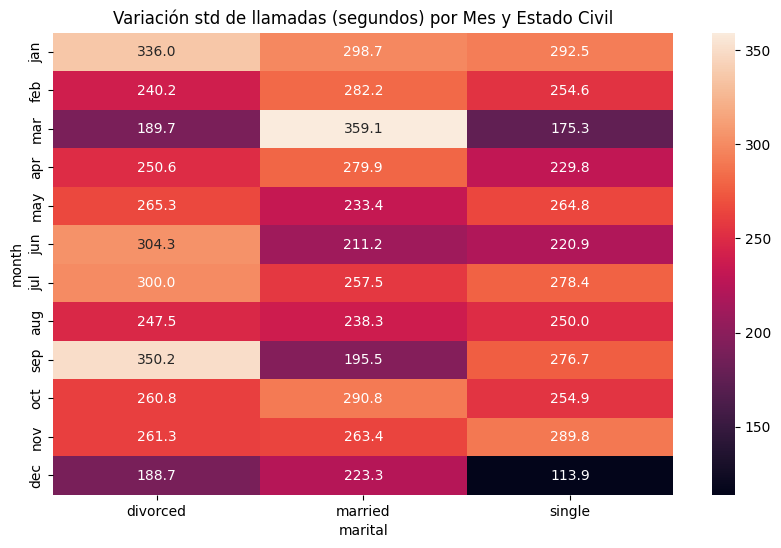

In [104]:
matrix = table_std.pivot_table(
    values="std_duration",
    index="month",
    columns="marital"
)
plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, fmt=".1f")
plt.title("Variación std de llamadas (segundos) por Mes y Estado Civil")
plt.show()